원문: Moler, Cleve B. Numerical computing with MATLAB. Society for Industrial and Applied Mathematics, 2008.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

세상에서 가장 흥미 있는 숫자는 어떤 것일까? 아마도 여러분 가운데는 원주율, 자연대수, 또는 17을 좋아하는 사람들이 있을 것이다. 어떤 사람은 phi, 즉 황금률을 선택할 수도 있다. 아래 계산식은 황금률을 계산하는 것이다.

In [2]:
phi = (1 + 5 ** 0.5) * 0.5
print('%g' % phi)

1.61803


더 많은 자릿수를 표시해 보자

In [4]:
print('%17.16g' % phi)

1.618033988749895


바로 위에서는 phi 를 새로 계산한 것이 아니고, 유효숫자를 16자리로 표시한 것이다.
황금률은 수학에서 자주 나타난다. 여기서도 자주 나타날 것이다.  황금률은 황금 직사각형에서 유래하였는데, 그림 1.1 에 표시되어 있다. 황금 직사각형에서 정사각형 부분을 제거하면 닮은꼴인 직사각형이 남는다.

(-0.088991869381244232, 1.8688292570061287, -0.055000000000000007, 1.155)

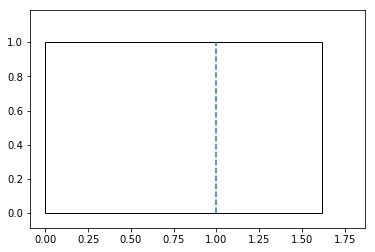

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

ax = plt.gca()
ax.cla()

phi = (1 + 5 ** 0.5) * 0.5

# add a rectangle
rect = patches.Rectangle((0.0, 0.0), phi, 1.0, fill=False)
rect_margin = patches.Rectangle((0.0, 0.0), phi * 1.1, 1.1, fill=False, edgecolor="none")
ax.add_patch(rect)
ax.add_patch(rect_margin)

plt.plot((1.0, 1.0), (0.0, 1.0), '--')

plt.axis('equal')
plt.show()

$\frac{1}{\phi} = \frac{\phi - 1}{1}$

이 방정식이 뜻하는 것은, 황금률의 역수를 구하려면, 황금률에서 1을 빼면 된다는 것이다.  이런 특징을 가진 숫자가 몇가지나 되겠는가?
가로세로비 등식의 양변에 황금률을 곱하면 다항식을 얻는다.

$\phi^2 - \phi - 1 = 0$

이 2차방정식의 근은 다음 식으로 주어진다.

$\phi= \frac{1 \pm \sqrt 5}{2}$

양의 근이 황금률이다.

In [23]:
import numpy as np
p = np.array([1, -1, -1])

$p(x) = x^2 - x - 1 $

을 나타낸다.  근은 roots() 함수로 계산한다.

In [24]:
np.roots(p)

array([ 1.61803399, -0.61803399])

위 두 수 만이, 1을 뺀 값과 그 역수가 같다.
기호처리로도 가로세로비 식을 풀 수 있는데, 다항식으로 바꾸지 않아도 된다. 기호 변수를 이용하여 식을 세우면 된다.

In [30]:
import sympy as sp
x = sp.symbols('x')
r = sp.solve(sp.Eq(1/x, x - 1), x)
print(r)

[1/2 + sqrt(5)/2, -sqrt(5)/2 + 1/2]


list

좀 더 보기 좋게 바꾸고 싶다면 다음과 같이 가능하다

In [28]:
# http://docs.sympy.org/latest/tutorial/printing.html
from sympy import init_printing
init_printing()
sp.solve(sp.Eq(1/x, x - 1), x)

⎡1   √5    √5   1⎤
⎢─ + ──, - ── + ─⎥
⎣2   2     2    2⎦

변수 r은 그 두 요소로 기호 형태의 근을 담고 있다.  첫번째 요소는 다음과 같이 접근할 수 있다.

In [32]:
phi = r[0]
phi

1   √5
─ + ──
2   2 

이 식을 숫자 형태로 변환하려면 두가지 방법이 있다. 가변 유효숫자 기능은 다음과 같다.

In [35]:
sp.N(phi,50)

1.6180339887498948482045868343656381177203091798058

또는 배정도 부동소숫점 값으로 변환할 수 있는데, 주로 이 방식을 숫자를 사용한다.

In [36]:
phi = float(phi)
phi

1.618033988749895

가로세로비 등식은 간단하기 때문에 닫힌 형태의 해를 구할 수 있었다. 더 복잡한 식은 근사해로만 구할 수 있다. 다음과 같이 익명 함수를 지정하여 다른 함수의 매개 변수로 사용할 수 있다.

In [37]:
f = lambda x: 1./x - (x-1)

In [38]:
f

<function __main__.<lambda>>

구간 $0 \ge x \ge 4$ $f(x)$ 

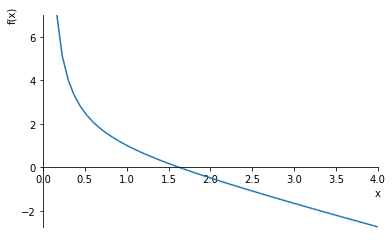

In [43]:
sp.plot(1./x - (x-1.), (x, 0, 4), ylim=(-3, 7))